# Simulations of Time series models in Python 

Any data indexed by time is called a time series data. Various models are used for the analysis of time series data. In this tutorial we will present a systematic study of time series models used to analyse data. This include the moving average model, the autoregressive model and their combinations. We will simulate these models in Python and then present some applications on real world data. Familiarity with notions from probability theory is expected from the reader, otherwise the tutorial is self contained. 

## Time series as a realization of a stochastic process

Time series is any data indexed by time. We can denote the values of a time series by $x_t$ for example. It is customary to assume that a time series is actually a realization of a stochastic process $\{X_t\}$ ($t = 1,2,3,\ldots$). In the rest of the tutorial by a time series we mean a stochastic process $\{X_t\}$. Recall that a stochastic process is simply a sequence of random variables. Let us see some very simple examples of time series.

### 1. Purely random process

A purely random process or simply 'noise' $\{X_t\}$ is a sequence of values drawn from random variables with normal distribution, or $X_t = \epsilon_t$ where $\epsilon_t \sim \mathcal N(\mu,\sigma^2).$ Let us simulate a purely random process and plot it using python. 

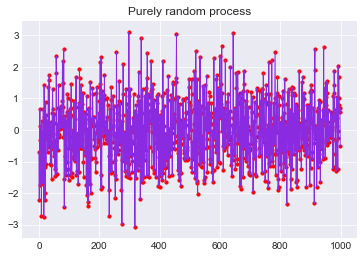

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

noise = np.random.normal(size = 1000)

plt.title("Purely random process")
plt.plot(noise,color="blueviolet",linewidth=1)
plt.scatter(np.arange(1000),noise,color = "red",s=10)
plt.show()

### 2. Random walk

A time series $\{X_t\}$ is said to be a random walk is it satisfies $X_t = X_{t-1} + \epsilon_t$, where $\epsilon_t$ is noise as defined earlier. Let us simulate a random walk. 

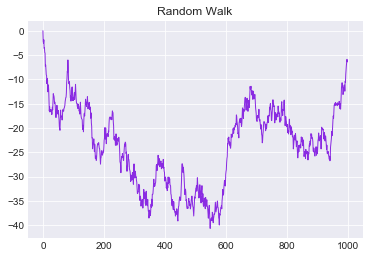

In [3]:
def random_walk():
    X = []
    X.append(0)
    for i in range(1,1000):
        X.append(X[i-1] + noise[i])
    return X

plt.title("Random Walk")
plt.plot(random_walk(),color="blueviolet",linewidth = 1)
plt.show()

# Stationarity of a time series

A time series $\{X_t\}$ is said to be weakly stationary if the expection and variance of $X_t$ is constant for each $t$. In the case when $X_t$'s are identically independently distributed, we say that the time series is strongly stationary. Notice that a random walk $X_t = X_{t-1} + \epsilon_t$ with $\epsilon_t \sim \mathcal N(\mu,\sigma^2)$ cannot be stationary unless $\mu$ and $\sigma$ are both zero, for supposing $X_0 = 0$, we have $$X_1 = Z_1, X_2 = Z_1 + Z_2, \ldots, X_t = \sum_{i=1}^t Z_i,$$ therefore $E(X_t) = t \mu$ and $var(X_t) = t \sigma^2$. This is also clear from the plot of the random walk.

Moving $X_{t-1}$ on the left hand side, a random walk is equivalent to $X_t - X_{t-1} = \epsilon_t$. Let $Z_t = X_t - X_{t-1}$ then $z_t = \epsilon_t$ is called "differenced time series". Let us plot the random walk after differencing. 

(Prove that the differenced random walk is stationary!)

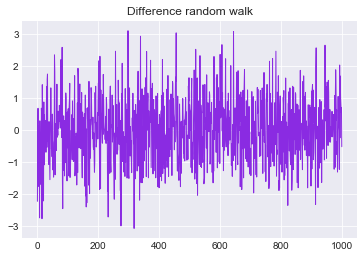

In [4]:
def diff_random_walk():
    X = random_walk()
    Y = []
    for i in range(1,len(X)):
        Y.append(X[i]-X[i-1])
    return Y

plt.title("Difference random walk")
plt.plot(diff_random_walk(),color='blueviolet',linewidth = 1)
plt.show()

Let us now start with some more involved examples of time series models. 


# Moving Average Process

A time series $X_t$ is said to be a moving average process of order $r$ if it satisfies the following equation:
$$X_t = a_t\epsilon_t + a_{t-1}\epsilon_{t-1} + \cdots + a_{t-r}\epsilon_{t-r}$$ where $\epsilon_i$s are random variables with normal distribution. It is easy to see that if $\epsilon_i$s are identically distributed (resp. have same mean and variance) then $X_t$ is stationary (resp. weakly stationary). Let us simulate moving average processes of order $2$ and $3$. Usually we take $a_t = 1$.

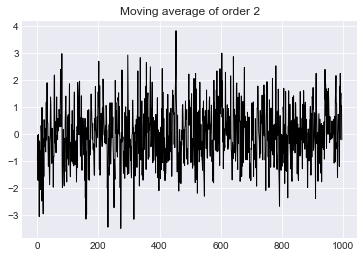

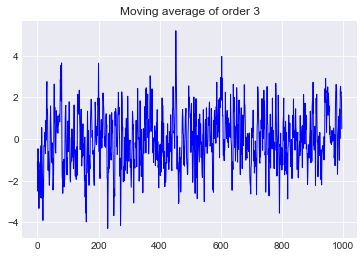

In [5]:
def moving_average_process(order, coeff):
    X = []
    value = 0
    for i in range(order,1000):
        value=noise[i]
        for item in coeff:
            value = value + item*noise[i-1] 
            i = i - 1
        X.append(value)
        value = 0
    return X

plt.title("Moving average of order 2")
plt.plot(moving_average_process(order = 2,coeff = [.2,.3])\
             ,color='black',linewidth = 1)
plt.show()
plt.title("Moving average of order 3")
plt.plot(moving_average_process(order = 3,coeff = [.5,.6,.4])\
             ,color='blue',linewidth = 1)
plt.show()

# Autoregressive processes

A time series $X_t$ is said to be an autoregressive process of order $r$ if it satisfies the following equation:

$$X_t = \sum_{i=1}^r a_i X_{t-i} + \epsilon_t,$$

where $\epsilon_t \sim \mathcal N(\mu,\sigma^2)$. Notice that the random walk is an autoregressive process of order $1$. Let us simulate autoregressive process of order $3$ and $4$. 

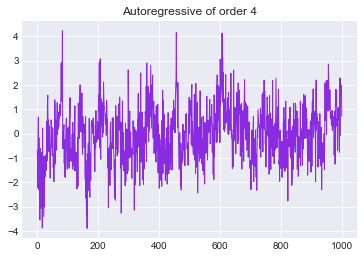

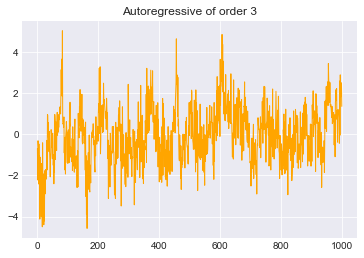

In [6]:
def autoreg_process(order,coeff):
    X = []
    for i in range(0,order):
        X.append(noise[i])
    
    value = 0
    for i in range(order,1000):
        value=noise[i]
        for item in coeff:
            value = value + item*X[i-1]
            i = i - 1            
        X.append(value)
        value = 0
    return X
    


plt.title("Autoregressive of order 4")
plt.plot(autoreg_process(4,[.1,.3,.2,.1]),color='blueviolet',linewidth=1)
plt.show()
plt.title("Autoregressive of order 3")
plt.plot(autoreg_process(3,[.1,.5,.2]),color='orange',linewidth=1)
plt.show()

# Autocovariance and Autocorrelation functions

Let $X_t$ be a stationary times series. The autocovariance function $\gamma_k$ is defined as $\gamma_k = Cov(X_t, X_{t+k})$ for any $t$. Since $X_t$ is stationary $\gamma_k$ is independent of $t$. Notice that $\gamma_0$ is simply the variance of the stationary time series $X_t$. The autocorrelation function of $X_t$ is defined as $\rho_k = \gamma_k / \gamma_0$

In the python library "statsmodels", there are tools for estimating the autocovariance function (acovf) and the autocorrelation function (acf). 

### ACF of a moving average process

Let us now plot the autocovariance function of the moving average process defined above. Notice that the first $r$ (in the simulation $2$ and $3$) values of the autocovariance function are significant and the rest are negligible. This happens because the autocovariance $\rho_k$ of a moving average process of order $r$ is zero if $k > r$. This can be seen as follows:

Let $X_t = \sum_{i = 1}^r a_i \epsilon_{t-i}$ be a moving average process of order $r$ and $k > r$. Then,

$$\gamma_k = Cov(X_t,X_{t-k}) = Cov \left(\left(\sum_{i=1}^r a_i\epsilon_i\right) \left(\sum_{i=1}^r a_i\epsilon_{i-k}\right)\right)$$

Expanding this above equation we will see that all the terms on the right hand side are zero, since $\epsilon_i$'s are independent random variables. This implies that the autocovariance is $0$ at any lag more than the order of the process.


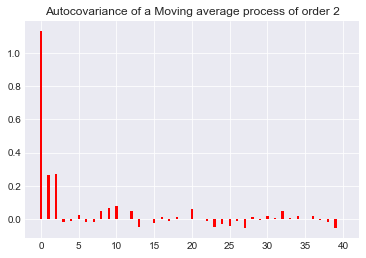

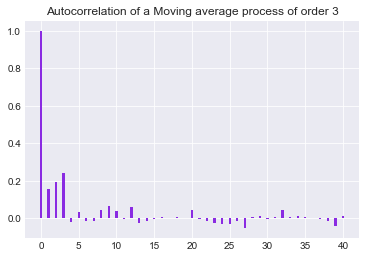

In [7]:
from statsmodels.tsa.stattools import acovf,acf,pacf

Y=np.arange(41)
Z= acovf(moving_average_process(2,[.2,.3]))[0:41]
X = acf(moving_average_process(3,[.1,.2,.3]),nlags = 40)
plt.title('Autocovariance of a Moving average process of order 2')
plt.bar(Y,Z,width=.3,color = 'red')
plt.show()
plt.title('Autocorrelation of a Moving average process of order 3')
plt.bar(Y,X,width=.3,color = 'blueviolet')
plt.show()

### ACF of an Autoregressive process (The Yule-Walker Equations)

The autocorrelation function of a stationary autoregressive process can be calculated using the Yule-Walker Equations associated to the process. They are difference equations that can be found as follows:

Let $X_t = \sum_{i=1}^r X_{t-i} + \epsilon_t$ be a stationary autoregressive process of order $r$ and constant mean $0$. First notice that the correlation function $\gamma$ satisfies $\gamma_k = \gamma_{-k}$. Now, multiplying by $X_{t-k}$ on both sides of the process we get:

$$X_tX_{t-k} = \sum_{i=1}^r X_{t-i} X_{t-k} + \epsilon_t X_{t-k}.$$

Taking expectations and dividing by the variance of $X_t$ on both sides we get:

$$\gamma_k =  \sum_{i=1}^r a_i \frac{Cov(X_{t-i}X_{t-i-(k-i)})}{\gamma_0}$$

or

$$\rho_k = \sum_{i=1}^r a_i \rho_{k-i}.$$

The above difference equation is called the Yule-Walker equation associated to $X_t$. Using the initial conditions $\rho_0 = 1$ and $\rho_{k} = \rho_{-k}$ we can solve this equation to find the autocorrelation function of $X_t$. 

Let us calculate the autocorrelation function of the autoregressive process of order $2$ given by $X_t = \frac{1}{3} X_{t-1} + \frac{1}{2} X_{t-2} + \epsilon_t$. This is a stationary time series, just why is it so will be clear later when we talk about invertibility.  

Now, the Yule-Walker equation for this time series will be $\rho_k = \frac{1}{3} \rho_{k-1} + \frac{1}{2} \rho_{k-1}$. On solving this equation using the initial conditions $\rho_0 = 1$ and $\rho_k = \rho_{-k}$ we find that for $k \geq  0$

$$\rho_k = \frac{4+\sqrt{6}}{8}\left(\frac{2+\sqrt{76})}{12}\right)^k + \frac{4-\sqrt{6}}{8}\left(\frac{2-\sqrt{76})}{12}\right)^k$$.

Let us now plot the autocorrelation function using the statsmodel library in python of the above time series.

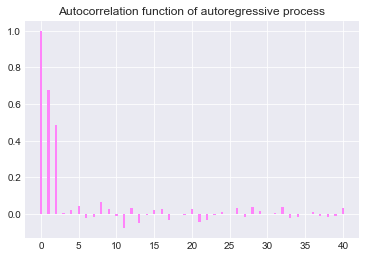

In [8]:
plt.title("Autocorrelation function of autoregressive process")
AR2 = autoreg_process(2,[1/3,1/2])
plt.bar(np.arange(41),pacf(AR2),width = .3,color = "#FF83FA")
plt.show()

# Backshift operator and invertibility of time series

A backshift operator $B$ is given by $$B X_t = X_{t-1}.$$

A time series $Z_t = \sum_{0}^{\infty} a_k X_{t-k}$ is said to be invertible if  $\sum_k^\infty |a_k|$ converges.

Let  $X_t = \alpha \cdot X_{t-1} + \epsilon_t$ be an autoregressive process of order $1$. Then, using the backshift operator we can write $X_t = \alpha \cdot B X_t + \epsilon_t.$ 

Equivalently,
$$X_t = \frac{\epsilon_t}{1- \alpha B} = \sum_{i=0}^{\infty} \alpha^i \epsilon_{t-i},$$
which is a moving average process of infinite order.

For $X_t$ to be invertible, we must have $|\alpha| < 1$. More generally, let $X_t = \sum_{i=1}^{r} a_i X_{t-i}  + \epsilon_t$ be an autoregressive process of order $r$. Then, using the backshift operator we can write it as:
$$X_t = \sum_{i=1}^{r} a_i B^i X_t + \epsilon_t.$$ 

This implies $$X_t = \frac{\epsilon_t}{1 - \theta(B)} = \sum_{i=0}^{\infty} \theta(B)^i \epsilon_t,$$
where $\theta(B) = \sum_{i=1}^{r} a_i B^i.$ By a well-known result in analysis, $X_t$ is invertible if all roots of the polynomial $1- \theta(B)$ are greater than one in absolute value.

This implies that an autoregressive process can be written as a moving average time series of infinite order if the polynomiall $1 - \theta(B)$ has roots of absolute value greater than one. And, in this case, since a moving average process is always stationary, the autoregressive process is also stationary.

# Estimation of the parameters of an Autoregressive process

Let $X_t = \sum_{i=1}^r a_i X_{t-1} + \epsilon_t$ be an autoregressive process of order $r$ with $\epsilon_t \sim \mathcal N(0,\sigma^2)$. Let $\rho_k$ be the values of autocorrelation function of $X_t$. Then, we know from the Yule-Walker equations:

$$ \rho_k = a_1 \rho_{k-1} + a_2 \rho_{k-2} + \cdots + a_r \rho_{k-r} $$

Using the fact that $\rho_k = \rho_{-k}$, for $k = 1,2,\ldots$ the above equation takes the following form:

$$\rho_1 = a_1 + a_2 \rho_{1} + a_3 \rho_{2} + \ldots + a_r \rho_{r-1}$$

$$\rho_2 = a_1 \rho_1 + a_2 + a_3 \rho_3 + \ldots + a_r \rho_{r-2}$$

$$ \vdots $$

$$\rho_r = a_1 \rho_{r-1} + a_2 \rho_{r-2} + a_3\rho_{r-3} + \cdots + a_r$$

In matrix notation we have:

$\overline{\rho} = B.\overline{a}$, where $\overline{\rho}$ is the column vector of the values of the autocorrelation function, $B$ is a symmetric matrix and $\overline{a}$ is the column vector of the coefficients of $X_t$. Since the symmetric matrices are always invertible, we can solve this linear system of equations and find the coefficients of $X_t$.

Notice also that:

$$Var (X_t) = \sum_{i=1}^r \phi_1^2 Var(X_{t-i}) + \sum_{i,j = 1,i\neq j}^r \phi_i\phi_j Cov(X_{i}X_{i+j-i}) + \sigma^2.$$

Thus, with the above equation we can calculate the variance $\sigma^2$ of $\epsilon_t$ also.

**Remark:** We can start with a more general Moving average process $X_t = a_0 + \sum_{i=1}^r a_i X_{t-i} + \epsilon_t$. But this can be reduced to the form above as follows: 

Taking expectations on both sides we have $\mu = a_0 + \sum_{i = 1}^r a_i \mu$. Then, setting $\tilde{X_t} = X_t - \mu$ and substracting the time series with this expresssion of $\mu$ we have $\tilde{X_t} = \sum_{i = 1} a_i \tilde{X_{t-1}}$. We can now use the method above to estimate the parameters of the time series $\tilde{X_t}$ and calculate $\mu = \frac{a_0}{1 - \sum_{i=1}^r a_i}$ to estimate $X_t$.

### An example

We will apply the above idea to a given time series. Here is what we are going to do. We start with a simulated time series, forget the equation that defines it and estimate its parameter using the idea above. So, let $X_t = (1/3) X_{t-1} + (1/2) X_{t-2} + \epsilon_t$ with $\epsilon_t \sim \mathcal N(0,4)$ be the time series we start with:

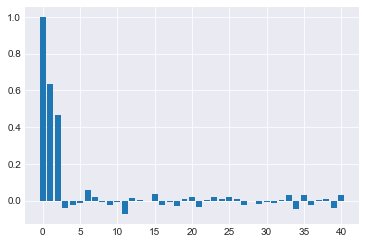

In [9]:
noise = np.random.normal(scale = 4,size = 1000)

Xt = autoreg_process(order=2,coeff=[1/3,1/2])

# Let us see what Pacf says about Xt's order

plt.bar(np.arange(41),pacf(Xt))
plt.show()

In [10]:
# The plot clearly says the order should be 2
# Let us now estimate the acf 

rho_1 = acf(Xt)[1]
rho_2 = acf(Xt)[2]

print(rho_1,rho_2)

0.635782225205825 0.6818852173678052


In [11]:
# We now need to solve the following system of linear equations

from numpy.linalg import solve

a = [[1,rho_1],[rho_1,1]]
b = [rho_1,rho_2]        

coefficients = solve(a,b)
coefficients

array([0.33947329, 0.46605413])

In [12]:
# We now calculate the variance of the noise. 
from math import sqrt

gamma_0 = acovf(Xt)[0]
a_1 = coefficients[0]
a_2 = coefficients[1]
var_noise = gamma_0 * (1 - a_1**2 -a_2**2 - (2* a_1 * a_2 * rho_1))
print(sqrt(var_noise))

4.004460536250546


Thus, according to the above calculations the estimated time series is: $X_t = .36 X_{t-1} + .51 X_{t-2} + \epsilon_t$ where $\epsilon_t \sim \mathcal N(0,4.09)$. And, this is pretty close to the time series we started with.

### Fitting an AR model into a real world data

Let us fit an autoregressive model into a real world data. We use the 'recruitment' dataset from an R package called 'astsa'. First of all we need to import this data in Python. Since the dataset is a part of an R package, this is a bit tricky. We make use of 'rpy2' module to do this.

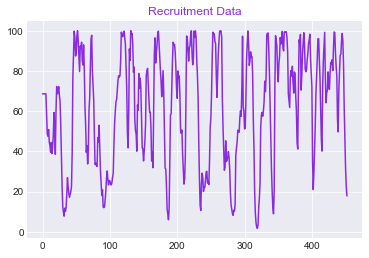

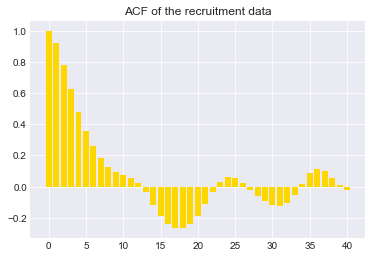

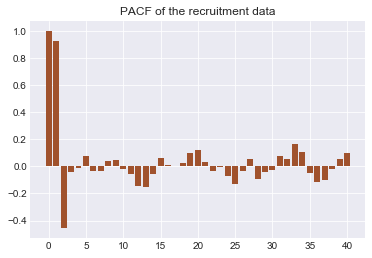

In [14]:
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri

utils = importr('astsa')

recruitment = pandas2ri.ri2py(r["rec"])

plt.title("Recruitment Data",color='blueviolet')
plt.plot(recruitment,color='blueviolet')
plt.show()

# The acf of the recruitment data
plt.title("ACF of the recruitment data")
plt.bar(np.arange(41),acf(recruitment),color='gold')
plt.show()

# The pacf of the recruitment data
plt.title("PACF of the recruitment data")
plt.bar(np.arange(41),pacf(recruitment),color='sienna',linewidth = 1)
plt.show()

We see from the plots above that the ACF is inconclusive while PACF suggest that an autoregressive process of order 2 might be a good fit to the recruitment data. So, suppose $X_t =a_0 + a_1 X_{t-1} + a_2 X_{t-2} + \epsilon_t$ is the fitted model. We need to find $a_1, a_2$ and the variance of the noise. This is done using the idea detailed in the previous section.

In [15]:
# The first two values of the autocorrelation fuctions are

rho_1 = acf(recruitment)[1]
rho_2 = acf(recruitment)[2]

# Autocovariance gamma_0

gamma_0 = acovf(recruitment)[0]

# To find a_1 and a_2 we need to solve

matrix = [[1,rho_1],[rho_1,1]]
coeff_rec = solve(matrix,[rho_1,rho_2])

print(coeff_rec)

a_1 = coeff_rec[0]
a_2 = coeff_rec[1]

# the variance of the noise

var_noise = gamma_0 * (1 - a_1**2 -a_2**2 - (2* a_1 * a_2 * rho_1))
print(var_noise)

# finally the mean of the time series

mean = np.mean(recruitment)*(1 - a_1 - a_2)
print(mean)

[ 1.33158739 -0.4445447 ]
94.17131010772924
7.0330362670859365


The fitted time series is $X_t = 7.03 + 1.33 X_{t-1} - 0.44 X_{t-2} + \epsilon_t$ where the variance of the noise is $94.17$.

# Autoregressive moving average processes (ARMA)

An Autoregressive moving average process (ARMA) is a combination of both an autoregressive and a moving average process. More precisely, an ARMA process $\{X_t\}$ of order $(p,q)$ is given by the equation:

$$X_t = \sum_{i = 1}^p a_i X_{t -i} + \sum_{j = 1}^r b_j \epsilon_{t - j} + \epsilon_t$$

where $\epsilon_i \sim \mathcal N(\mu,\sigma^2)$.

Let us simulate an ARMA process of order $(3,4)$.

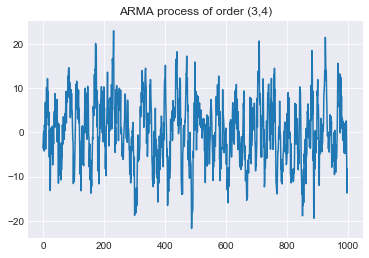

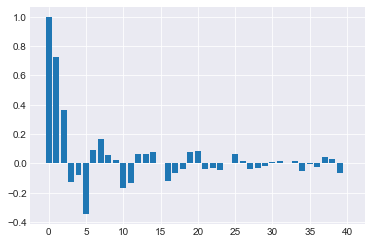

In [16]:
def arma34():
    X = []
    for i in range(0,4):
        X.append(noise[i])
    
    for i in range(4,1000):
        X.append(.1*X[i-1] + (.3)*X[i-2] + (.07)*X[i-3] + .3*noise[i-1]\
                 + .4*noise[i-2] + .5*noise[i-3] + .6*noise[i-4] + noise[i])
    return X

plt.title("ARMA process of order (3,4)")
plt.plot(arma34())
plt.show()

plt.bar(np.arange(41),pacf(arma34()))
plt.show()

# Application of ARIMA model in real world data

We will fit an ARIMA model on 'daily_female_birth' data from 1959. The data can be downloaded from https://datamarket.com/data/set/235k/daily-total-female-births-in-california-1959#!ds=235k&display=line



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil

birth_data = pd.read_csv('daily-total-female-births-in-cal.csv')


dateutil.parser.parse(birth_data['Date'][1])

plt.plot(birth_data['Date'].apply(lambda x : dateutil.parser.parse(x))\
         ,birth_data['Daily total female births in California, 1959'],linewidth=1)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import q_stat
from statsmodels.tsa.stattools import acovf,acf,pacf

q_stat(acf(birth_data['Daily total female births in California, 1959'])\
       ,len(birth_data),type='ljungbox')

diff_data = birth_data['Daily total female births in California, 1959'].diff()
plt.plot(diff_data)
plt.show()

In [ ]:
plt.bar(np.arange(len(pacf(diff_data[1:]))),acf(diff_data[1:]))
plt.show()